# Part II - prosperLoanData Exploration Title
## by Mostafa Tamer Ghobashy

## Investigation Overview


- In this presentation we will Analyze Borrower and Loan Trends, Understand Creditworthiness Factors, and Examine Market Shifts Over Time.

## Dataset Overview and Executive Summary


1. Debt consolidation is the primary reason for loans.
2. Most loans have a 36-month payment term.
3. Loan amounts are right-skewed, often in multiples of $5,000.
4. Income distribution is roughly normal, peaking at $5,000.
5. Borrowers tend to repay loans more often in the last two quarters of the year.
6. Debt-to-income ratio (DTI) is negatively correlated with income, especially among homeowners.
7. Credit scores negatively correlate with borrower APR, borrower rate, and lender yield.
8. Minimum credit requirements increased in 2008/2009.
9. Trusted occupations include Government, Military, Law, and Transportation, while Trading is the least trusted.
10. Self-employment was less trusted in 2010-2012 but gained trust after 2013/2014.
11. People with lower incomes tend to have a higher loans and DTI than those with higher incomes.
12. The average credit score declined after 2009 but started increasing afterward.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("./data/clean.csv")

## 1. What is the main reason for loans?

As you see, the main reason with a big margin is Debt Consolidation.

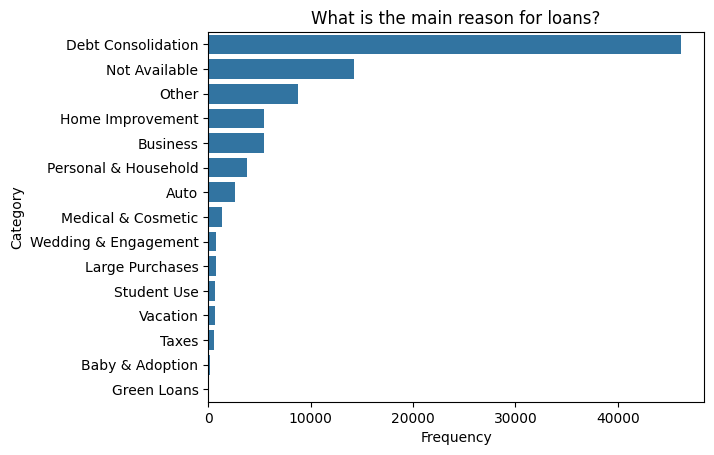

In [15]:
freq_listing_cat = df["ListingCategory"].value_counts().sort_values(ascending=False)
sns.barplot(y=freq_listing_cat.index, x=freq_listing_cat.values) # I didn't use a normal histogram to sort the values

plt.ylabel("Category")
plt.xlabel("Frequency")
plt.title("What is the main reason for loans?")
plt.show()

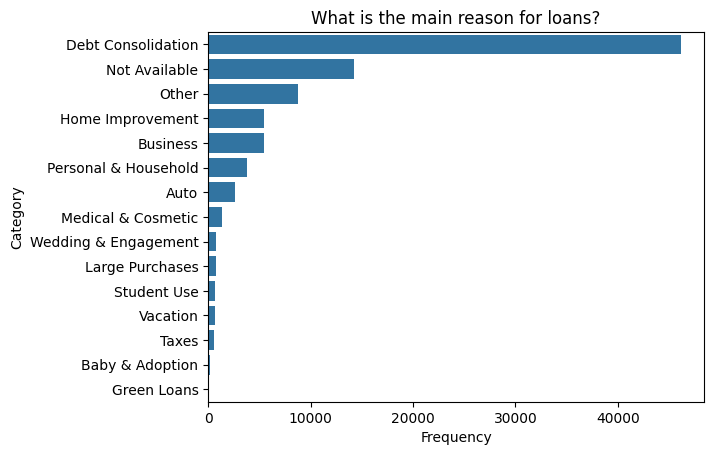

## 2. What is the most common payment term?

As the above plot shows, the most common payment term is 36 months.

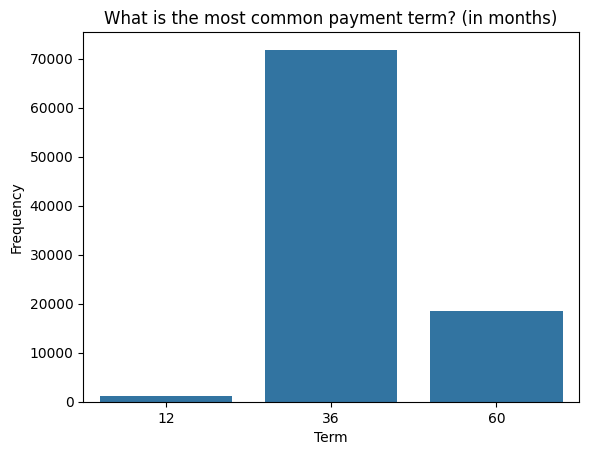

In [17]:
sns.countplot(x=(df["Term"].str.strip(" days")).astype(int)//30)

plt.xlabel("Term")
plt.ylabel("Frequency")
plt.title("What is the most common payment term? (in months)")
plt.show()

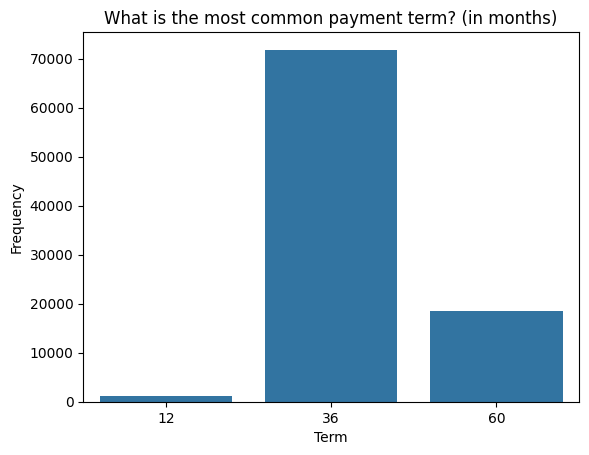

## 3. How is the loan amount distributed?

According to the plot below, the loan amounts are right-skewed, often peaking with-in multiples of $5,000.

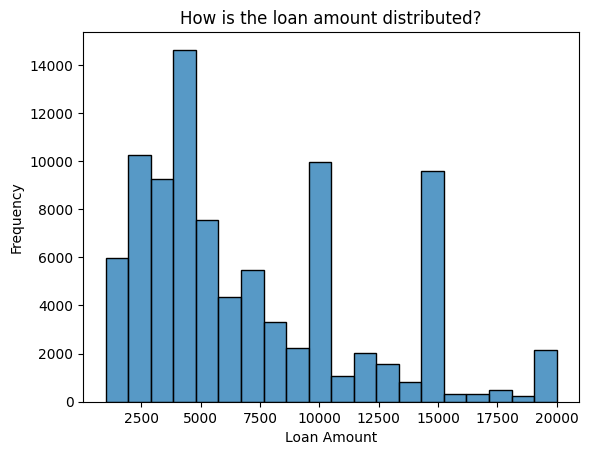

In [18]:
sns.histplot(data=df, x="LoanOriginalAmount", bins=20)

plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.title("How is the loan amount distributed?")
plt.show()

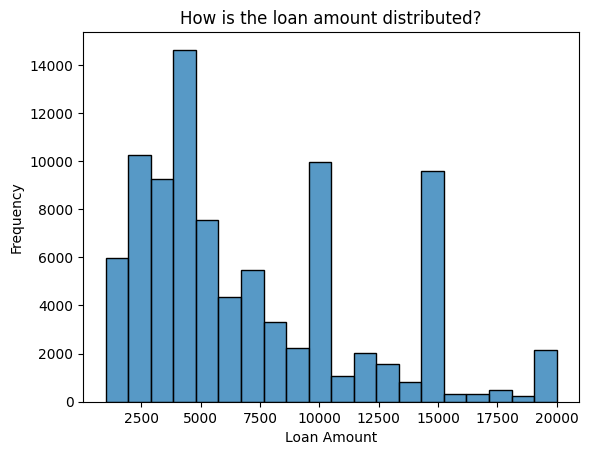

## 4. How is the income distributed?

According to the plot below, the income distribution is roughly normal, peaking at $5,000.

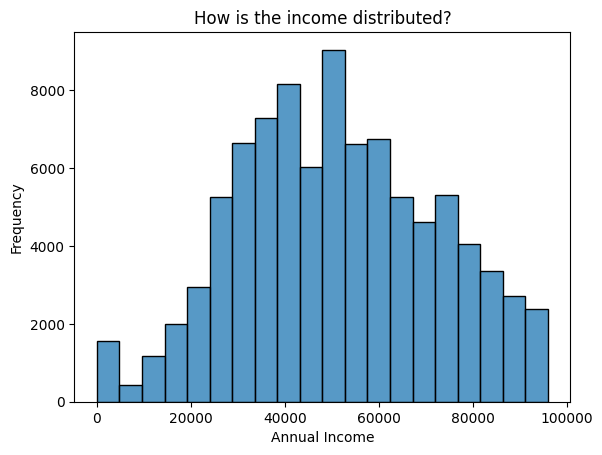

In [19]:
sns.histplot(data=df, x="AnnualIncome", bins=20)

plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("How is the income distributed?")
plt.show()

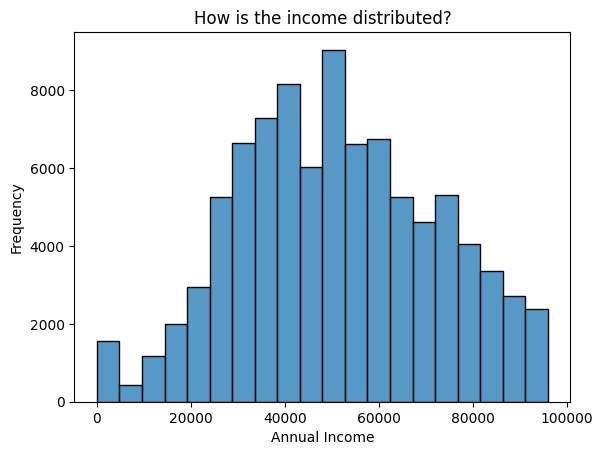

## 5. When is it likely that a borrower repays a loan?
This plot shows that the probalitiy is increasing over time, thus people are more likely to repay their loans in the last two quarters of the year.

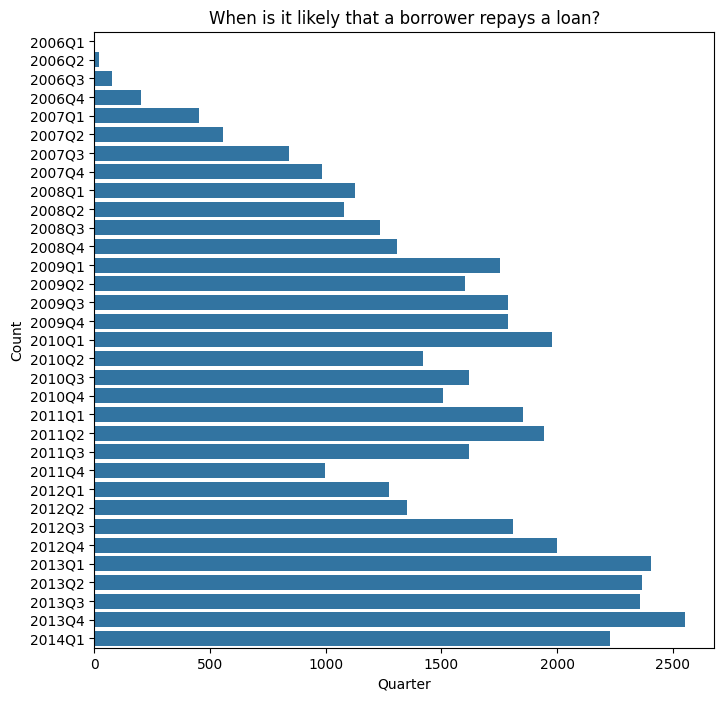

In [24]:
plt.figure(figsize=(8, 8))
df["ClosedQuarter"] = df["ClosedDate"].astype("datetime64[ns]").dt.to_period("Q")
quarterly_counts = df.groupby("ClosedQuarter").size().reset_index(name="Count")

sns.barplot(data=quarterly_counts, y="ClosedQuarter", x="Count")

plt.xlabel("Quarter")
plt.ylabel("Count")
plt.title("When is it likely that a borrower repays a loan?")
plt.show()

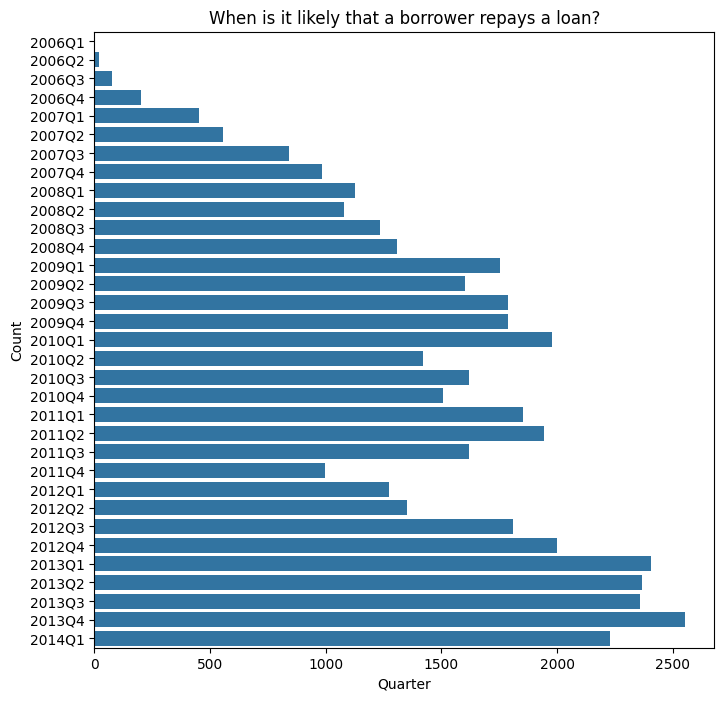

## 6. How correlated is the DTI (Debt to Income) with income?
As you see, the DTI is negatively correlated with income, especially among homeowners.

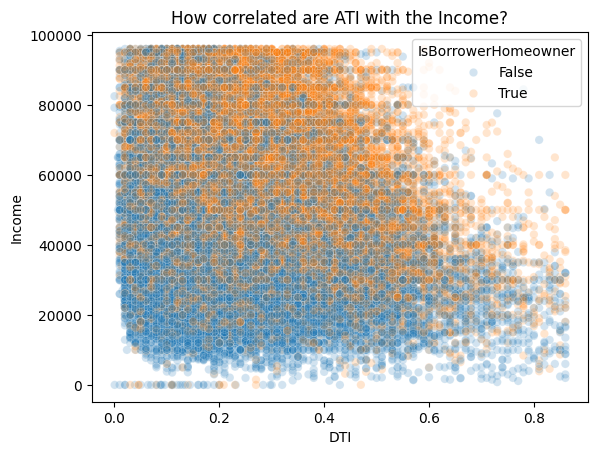

In [25]:
sns.scatterplot(data=df, x="DebtToIncomeRatio", y="AnnualIncome", hue="IsBorrowerHomeowner", alpha=0.2)

plt.xlabel("DTI")
plt.ylabel("Income")
plt.title("How correlated are ATI with the Income?")
plt.show()

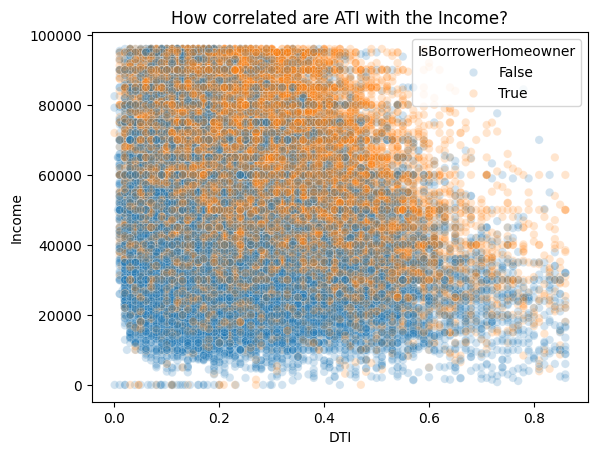

### 7. What other corrolations are there between variables?
- There is a strong positive correlation between EstimatedReturn and BorrowerAPR.
- Weirdly, there is a negative correlation between BorrowerAPR and the credit score.
> That means that the credit score affects the intrest rate of the loan.
- There is a very strong possitive correlation between BorrowerAPR/EstimatedReturn and LenderYield.
- There is a negative correlation between borrower APR and the loan amount.

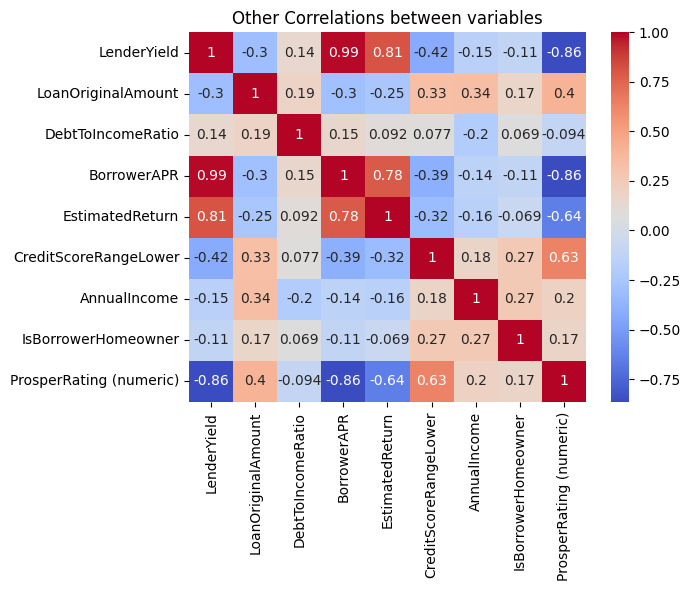

In [27]:
num_vars = ["LenderYield", "LoanOriginalAmount",
            "DebtToIncomeRatio", "BorrowerAPR",
            "EstimatedReturn", "CreditScoreRangeLower",
            "AnnualIncome", "IsBorrowerHomeowner", "ProsperRating (numeric)"]

corr = df[num_vars].corr()

sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Other Correlations between variables")
plt.show()

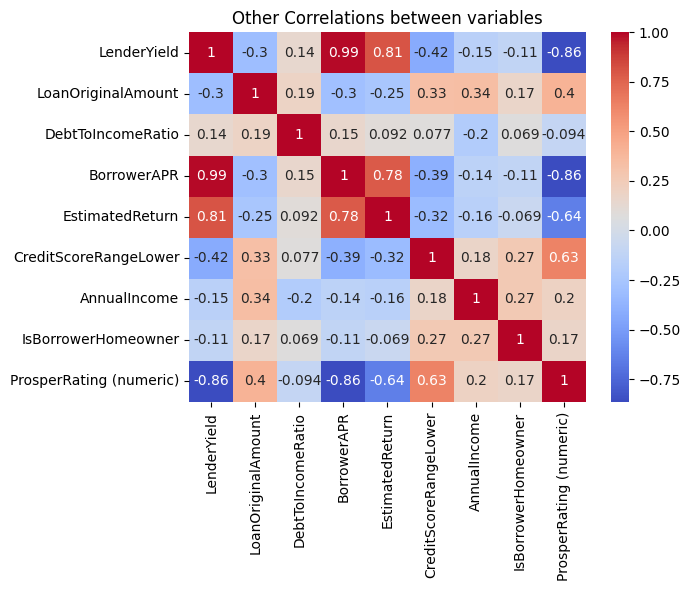

## 8. How did the credit score requirements change over time?

As the plot suggests, the credit score requirements increased a big jump in 2008/2009 and then stayed as is.

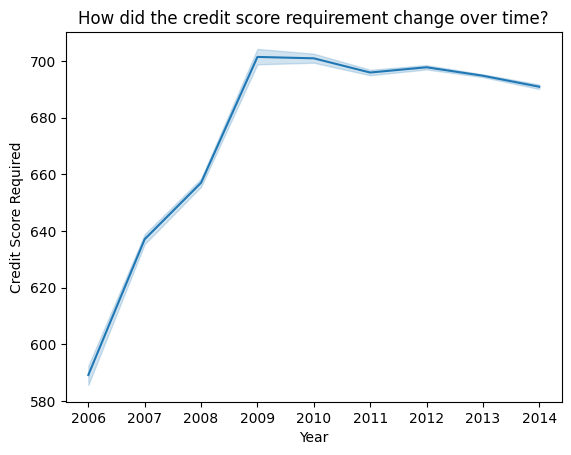

In [28]:
sns.lineplot(data=df, x="Year", y="CreditScoreRangeLower")

plt.xlabel("Year")
plt.ylabel("Credit Score Required")
plt.title("How did the credit score requirement change over time?")
plt.show()

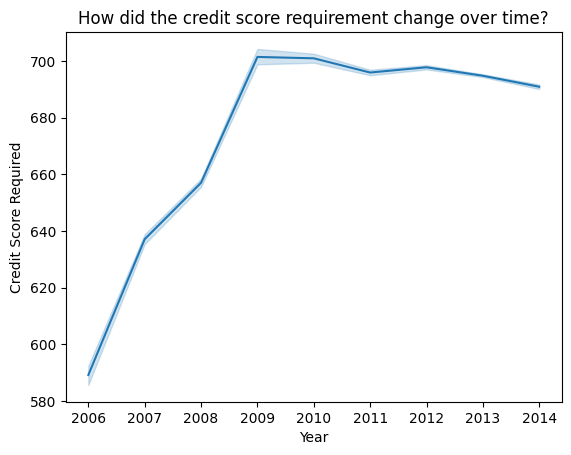

## 9. What are the most and least trusted occupations?

As the plot suggests, Government, Military, Law, and Transportation are the most trusted occupations, while Trading is the least trusted.

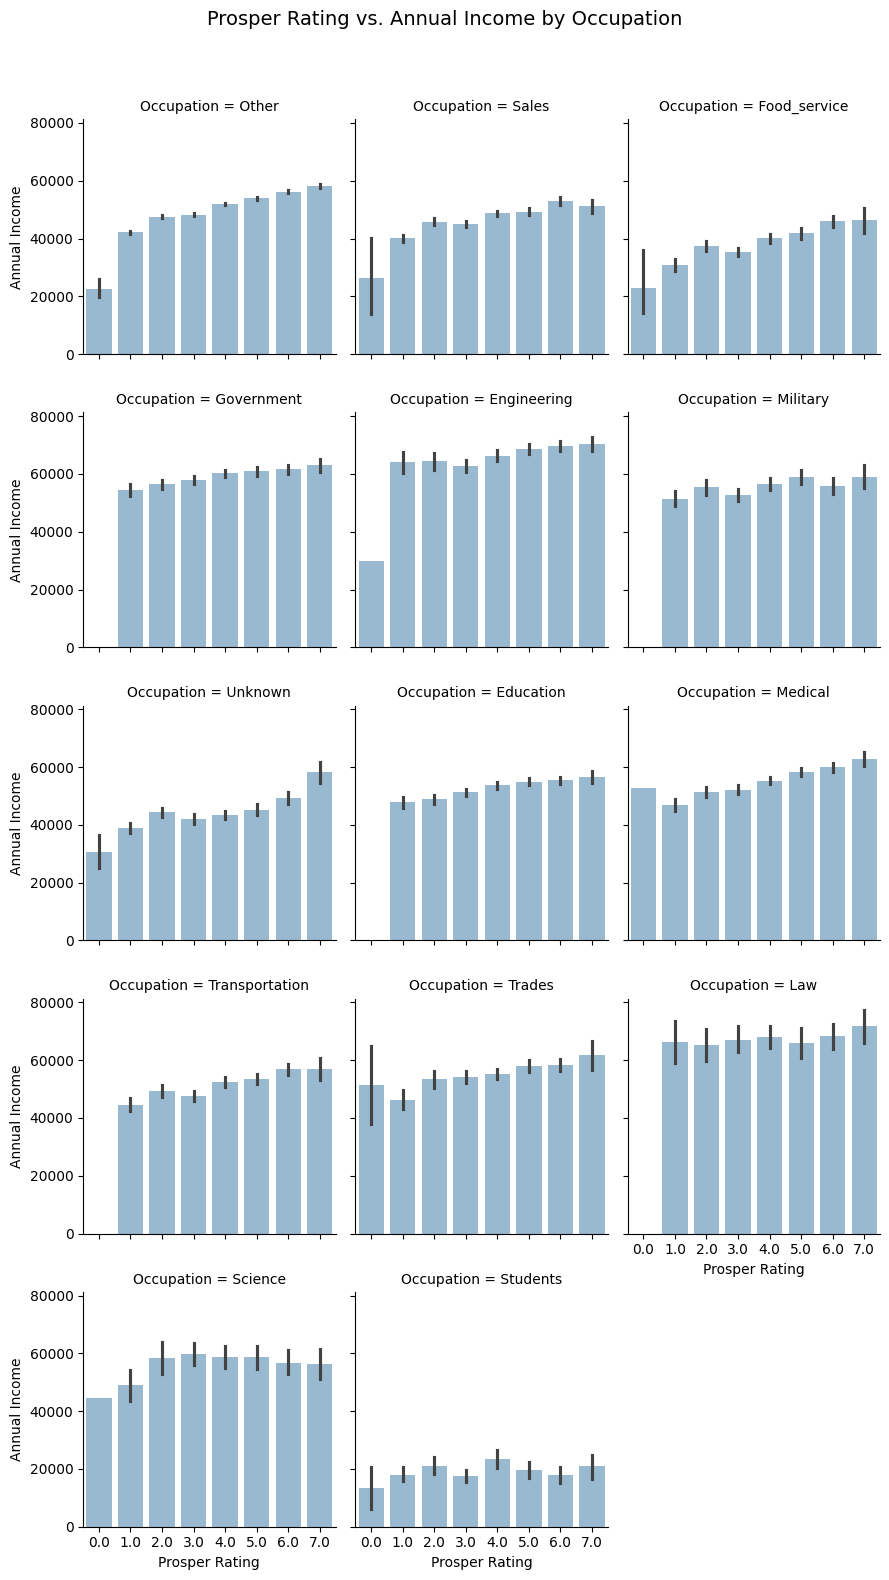

In [29]:
g = sns.FacetGrid(df, col="Occupation", col_wrap=3)

g.map(sns.barplot, "ProsperRating (numeric)", "AnnualIncome", alpha=0.5)

g.set_axis_labels("Prosper Rating", "Annual Income")
g.fig.suptitle("Prosper Rating vs. Annual Income by Occupation", fontsize=14, y=1.05)

plt.show()

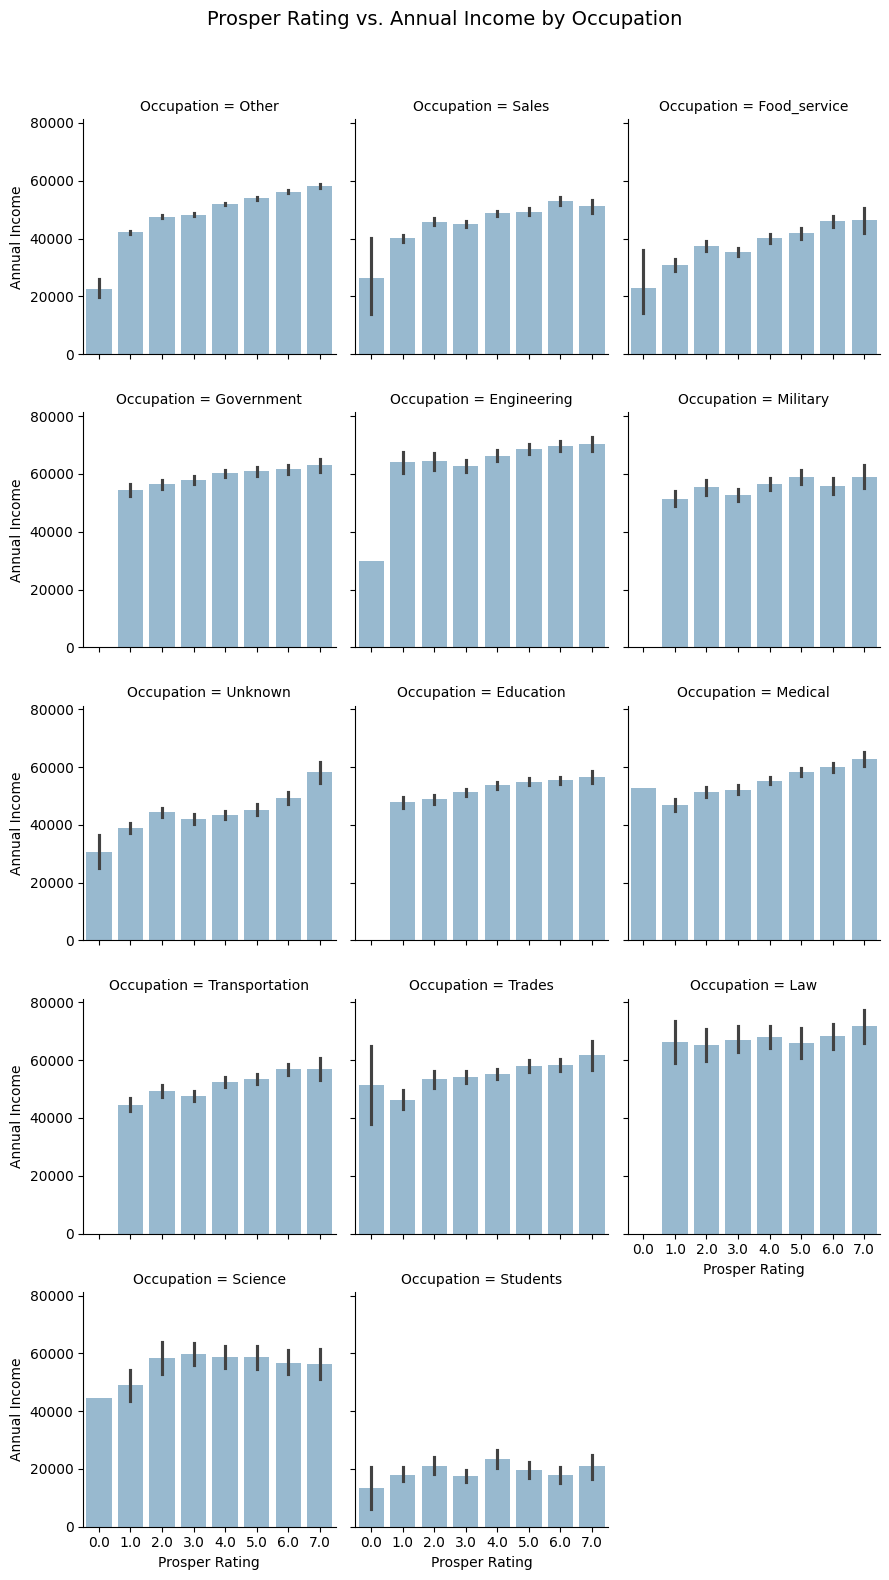

## 10. How trusted were employment statuses?

As the plot suggests, Self-employment was less trusted in 2010-2012 but gained trust after 2013/2014.

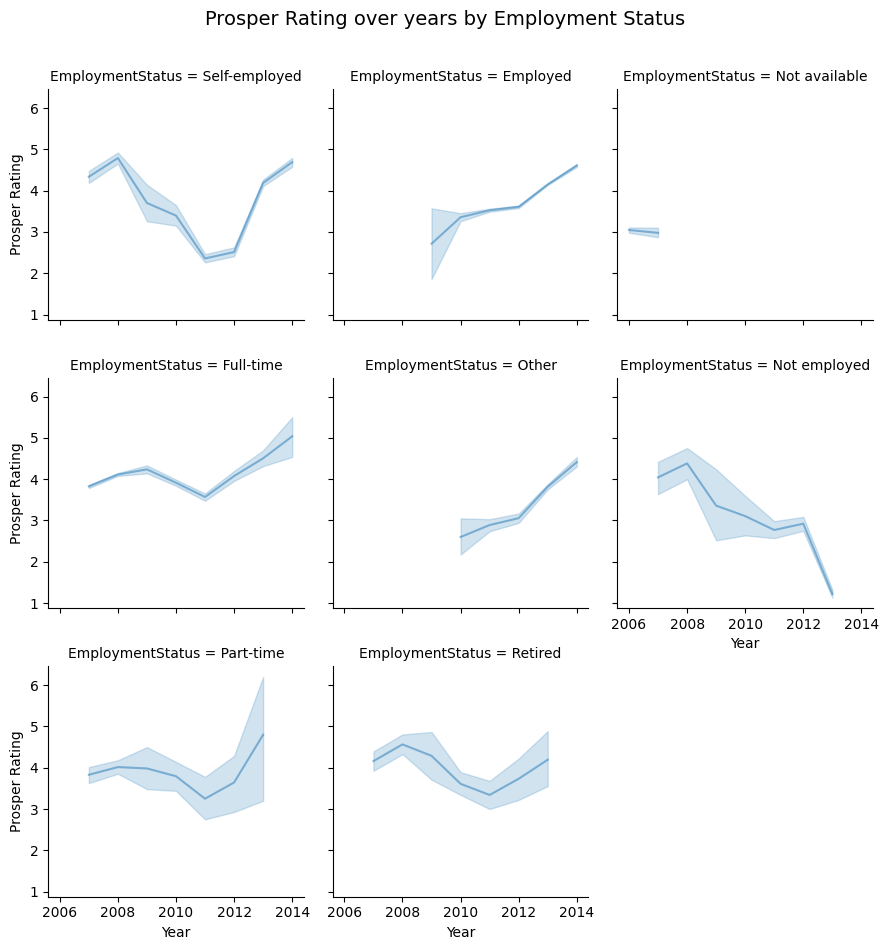

In [30]:
g = sns.FacetGrid(df, col="EmploymentStatus", col_wrap=3)

g.map(sns.lineplot, "Year", "ProsperRating (numeric)", alpha=0.5)

g.set_axis_labels("Year", "Prosper Rating")
g.fig.suptitle("Prosper Rating over years by Employment Status", fontsize=14, y=1.05)

plt.show()

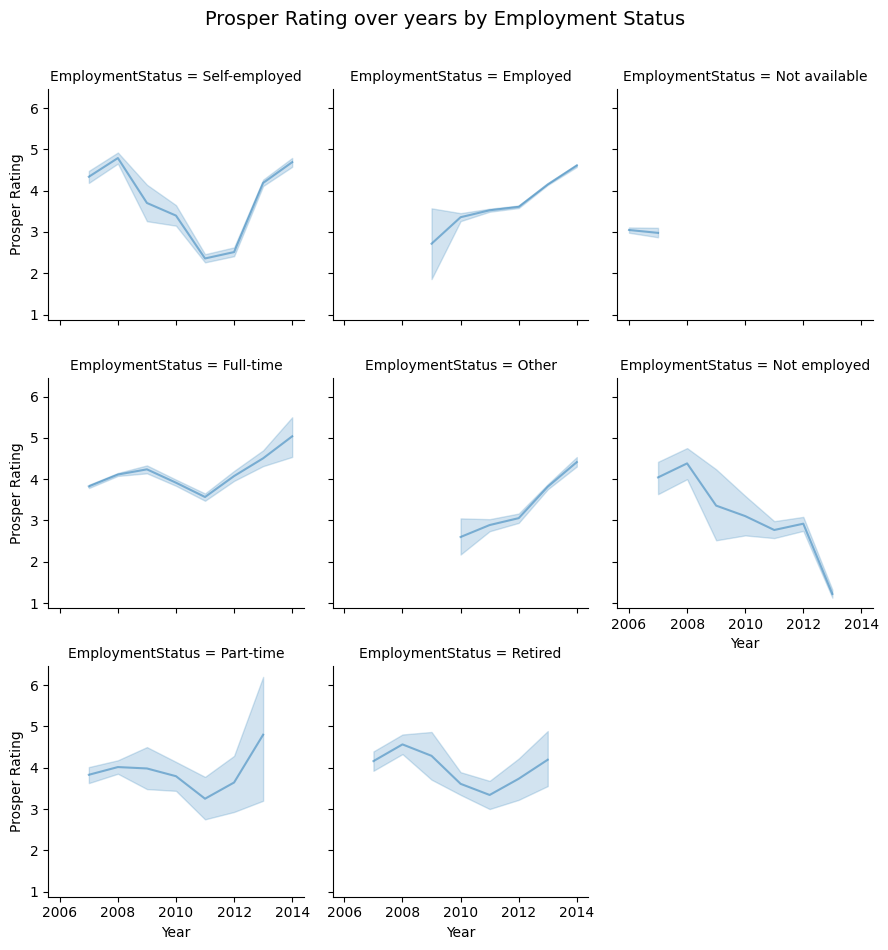

## 11. How does the DTI and loan amount change over income?

As the plot suggests, people with lower incomes tend to have a higher loans and DTI than those with higher incomes.

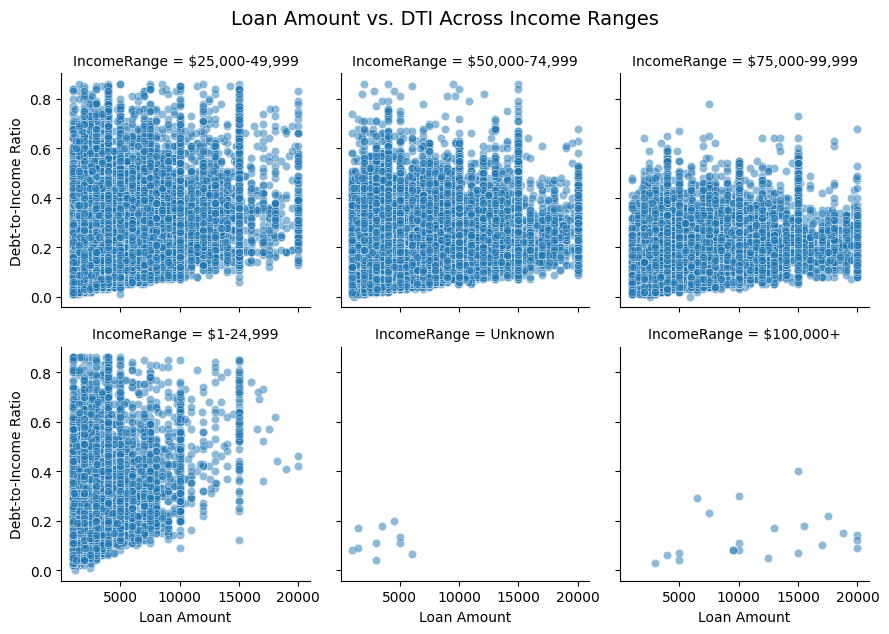

In [31]:
g = sns.FacetGrid(df, col="IncomeRange", col_wrap=3)


g.map(sns.scatterplot, "LoanOriginalAmount", "DebtToIncomeRatio", alpha=0.5)

g.set_axis_labels("Loan Amount", "Debt-to-Income Ratio")
g.fig.suptitle("Loan Amount vs. DTI Across Income Ranges", fontsize=14, y=1.05)

plt.show()

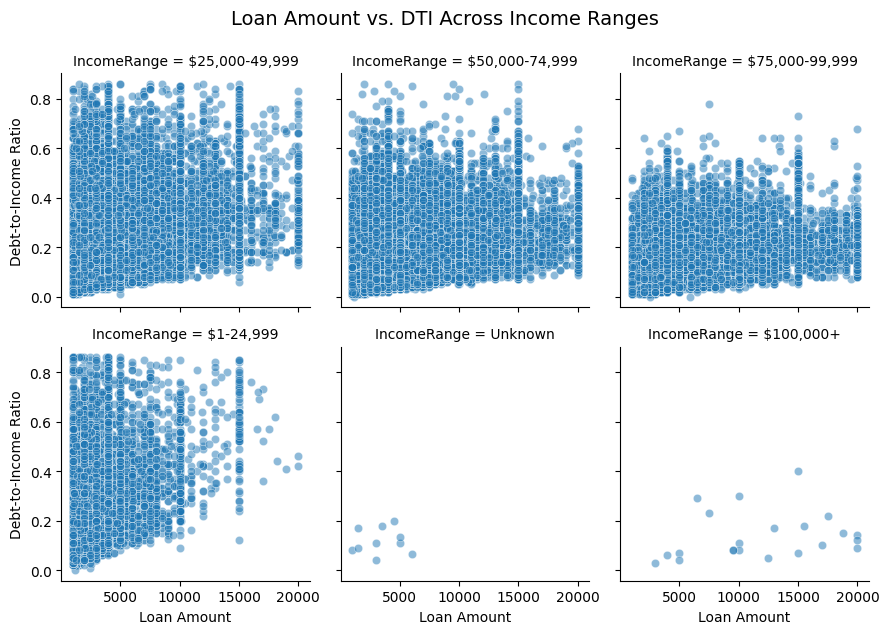

## 12. How does the credit score change over time?

As the plot suggests, the average credit score declined after 2009 but started increasing afterward.

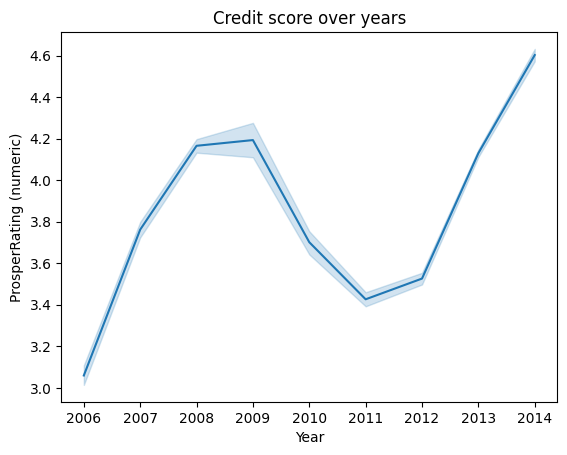

In [33]:
sns.lineplot(data=df, y="ProsperRating (numeric)", x="Year")

plt.xlabel("Year")
plt.ylabel("ProsperRating (numeric)")
plt.title("Credit score over years")
plt.show()

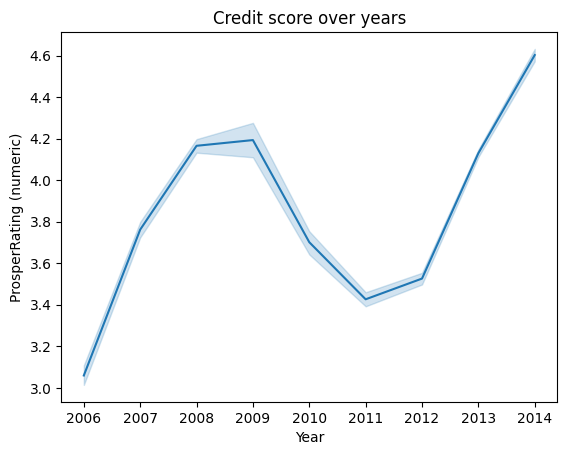